In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data=np.random.random((1000,100))
labels=np.random.randint(2,size =(1000,1))
labels

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [3]:
model =Sequential()
model.add(Dense(32, activation="relu", input_dim=100))
model.add(Dense(1, activation="sigmoid"))

In [4]:
model.compile(optimizer="adam" , loss="mse" , metrics ="accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3232      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [5]:
history=model.fit(data, labels , epochs=100 ,batch_size=32, verbose=0)

In [6]:
history.history["loss"][-1]

0.05284986272454262

In [7]:
history.history["accuracy"][-1]

0.9789999723434448

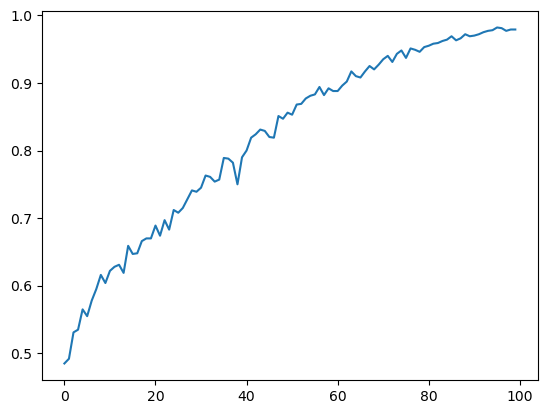

In [8]:
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"])

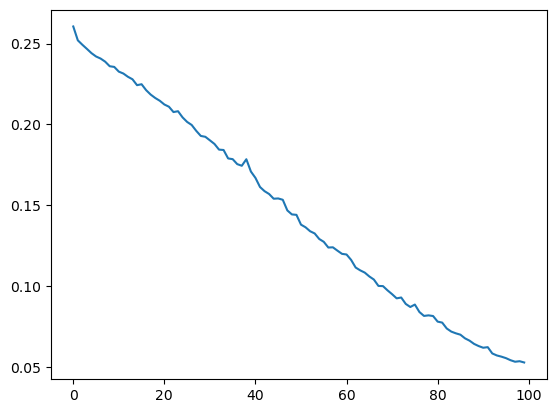

In [9]:
plt.plot(history.history["loss"])

In [10]:
from tensorflow.keras.utils import to_categorical
label_cat= to_categorical(labels)
label_cat.shape

(1000, 2)

In [11]:
label_cat[5]

array([1., 0.], dtype=float32)

In [12]:
labels[5]

array([0])

In [13]:
model1 =Sequential()
model1.add(Dense(32, activation="relu", input_dim=100))
model1.add(Dense(2, activation="sigmoid"))

In [14]:
model1.compile(optimizer="sgd" , loss="binary_crossentropy" , metrics ="accuracy")
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                3232      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 3,298
Trainable params: 3,298
Non-trainable params: 0
_________________________________________________________________


In [15]:
history=model1.fit(data, label_cat , epochs=500 ,batch_size=16, verbose=0)

In [16]:
history.history["loss"][-1]

0.22697259485721588

In [17]:
history.history["accuracy"][-1]

0.9710000157356262

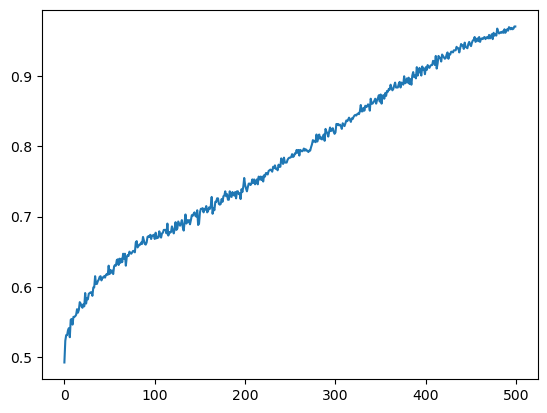

In [18]:
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"])

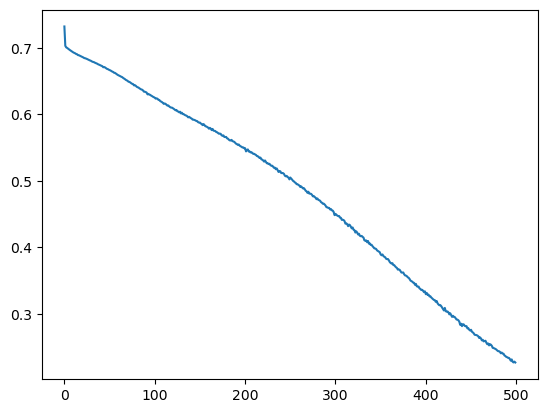

In [19]:
plt.plot(history.history["loss"])

# saving model

In [20]:
model1.save("samplekerasmodel.hs")

INFO:tensorflow:Assets written to: samplekerasmodel.hs\assets


INFO:tensorflow:Assets written to: samplekerasmodel.hs\assets


In [21]:
import keras
rec= keras.models.load_model("samplekerasmodel.hs")
rec.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                3232      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 3,298
Trainable params: 3,298
Non-trainable params: 0
_________________________________________________________________


In [22]:
rec.evaluate(data, label_cat )

32/32 [==============================] - 0s 1ms/step - loss: 0.2209 - accuracy: 0.9720


[0.22086624801158905, 0.972000002861023]

# Dealing with data


In [23]:
import pandas as pd

In [24]:
dataset = pd.read_csv("pima-indians-diabetes.csv")
dataset.shape

(767, 9)

In [25]:
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [26]:
x= dataset.iloc[:, :8]
y= dataset.iloc[:,8]

In [27]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, text_y=train_test_split(x,y ,test_size=0.3)
train_x.shape, test_x.shape, train_y.shape, text_y.shape

((536, 8), (231, 8), (536,), (231,))

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
model3= Sequential()
model3.add(Dense(12, activation="sigmoid", input_dim=8))
model3.add(Dense(8, activation="relu"))
model3.add(Dense(1, activation="relu"))

In [30]:
model3.compile(optimizer="adam" , loss ="mse", metrics ="accuracy")
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                108       
                                                                 
 dense_5 (Dense)             (None, 8)                 104       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [31]:
history=model3.fit(train_x, train_y, epochs=100 , verbose=0, batch_size=32, validation_data=(test_x, text_y))
key=history.history.keys()

In [32]:
for i in key:
    print(i,history.history[i][-1])
    

loss 0.1667971909046173
accuracy 0.7350746393203735
val_loss 0.2357690930366516
val_accuracy 0.6147186160087585


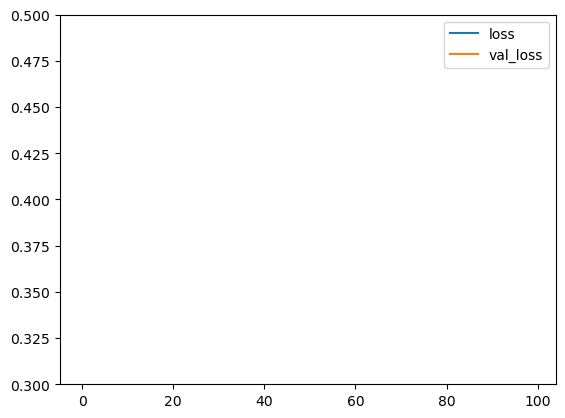

In [33]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.ylim(0.3,0.5)
plt.legend();

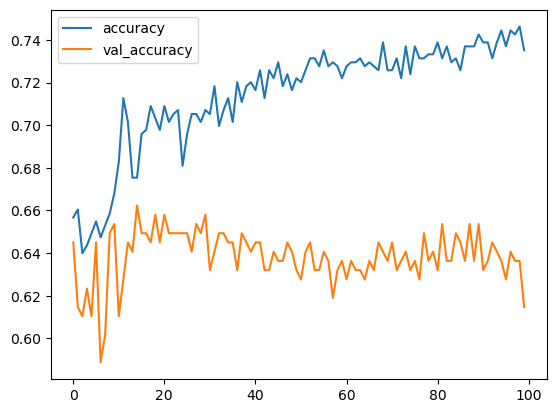

In [34]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend();

In [35]:
model3.evaluate(test_x, text_y)

8/8 [==============================] - 0s 1ms/step - loss: 0.2358 - accuracy: 0.6147


[0.2357690930366516, 0.6147186160087585]

# K fold cross validation

In [36]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=5, shuffle= True,  random_state=None)

In [37]:
for train, test in kfold.split(x,y):
    model4= Sequential()
    model4.add(Dense(12, activation="sigmoid", input_dim=8))
    model4.add(Dense(8, activation="relu"))
    model4.add(Dense(1, activation="relu"))
    model4.compile(optimizer="adam" , loss ="mse", metrics ="accuracy")
    history=model4.fit(x.iloc[train], y[train], epochs=100 , verbose=0, batch_size=32, validation_data=(x.iloc[test], y[test]))
    key=history.history.keys()
    for i in key:
        print(i,history.history[i][-1])
    print("\n")
    

loss 0.18930481374263763
accuracy 0.7014681696891785
val_loss 0.2107648253440857
val_accuracy 0.6688311696052551


loss 0.17463135719299316
accuracy 0.7324633002281189
val_loss 0.22784475982189178
val_accuracy 0.649350643157959


loss 0.19016365706920624
accuracy 0.7052116990089417
val_loss 0.22578071057796478
val_accuracy 0.6405228972434998


loss 0.18899647891521454
accuracy 0.7182410359382629
val_loss 0.2097986936569214
val_accuracy 0.673202633857727


loss 0.19406616687774658
accuracy 0.708469033241272
val_loss 0.23368720710277557
val_accuracy 0.6666666865348816


